# Dropout and Batch Normalization

Add these special layers to prevent overfitting and stabilize training.

## Example - Using Dropout and Batch Normalization¶

Skrip Python ini dirancang untuk mempersiapkan dataset untuk membangun model pembelajaran mesin yang memprediksi kualitas anggur merah. Ini melibatkan membaca dataset, membuat pembagian data latihan dan validasi, penskalaan fitur, dan pemisahan fitur dari variabel target.

Skrip ini dimulai dengan mengimpor pustaka yang diperlukan:

In [ ]:
# Setup plotting
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

import pandas as pd

red_wine = pd.read_csv('./red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

<ipython-input-3-996325bfd0e3>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


* pandas (sebagai pd): Pustaka manipulasi dan analisis data yang kuat.
* display dari IPython.display: Fungsi untuk menampilkan objek Python dalam format yang lebih kaya.

Di sini, red_wine adalah objek DataFrame yang berisi data dari file 'red-wine.csv'.

Dataset secara acak dibagi menjadi set data latihan dan validasi untuk memastikan model dapat dilatih dan divalidasi pada set data yang berbeda:
* df_train dibuat dengan mengambil sampel 70% data dari red_wine menggunakan sample(frac=0.7, random_state=0), di mana random_state memastikan reproduktibilitas.
* df_valid diperoleh dengan menghapus indeks df_train dari red_wine, memastikan tidak ada tumpang tindih antara data latihan dan validasi.

Penskalaan fitur penting untuk banyak algoritma pembelajaran mesin agar berperforma baik. Di sini, kami menyesuaikan skala fitur ke rentang [0, 1]:
* max_ dan min_ menghitung nilai maksimum dan minimum untuk setiap kolom di df_train.
* Baik df_train maupun df_valid diubah skala menggunakan nilai maksimum dan minimum ini untuk memastikan konsistensi dalam penskalaan.

Akhirnya, fitur dan variabel target ('quality') dipisahkan untuk dataset latihan dan validasi:
* X_train dan X_valid berisi fitur.
* y_train dan y_valid berisi variabel target.

Persiapan ini memungkinkan data untuk dengan mudah digunakan untuk melatih model pembelajaran mesin untuk memprediksi kualitas anggur merah.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

1. Lapisan Dropout:
  * Lapisan Dropout digunakan setelah setiap lapisan Dense.
  * Lapisan Dropout membantu mengurangi overfitting dengan secara acak menghapus sebagian unit (neuron) selama pelatihan.
  * Nilai 0.3 yang diberikan menunjukkan bahwa sekitar 30% unit akan dinonaktifkan secara acak pada setiap iterasi pelatihan.

2. Lapisan Batch Normalization:
  * Lapisan BatchNormalization juga ditambahkan setelah setiap lapisan Dense.
  * Lapisan ini membantu mempercepat pelatihan dan meningkatkan stabilitas model dengan mengnormalisasi input pada setiap batch data.

3. Jumlah Unit pada Lapisan:
  * Terdapat 1024 unit yang digunakan pada setiap lapisan Dense.
  * Jumlah unit yang lebih besar dapat meningkatkan kapasitas model, tetapi juga memerlukan lebih banyak sumber daya komputasi.


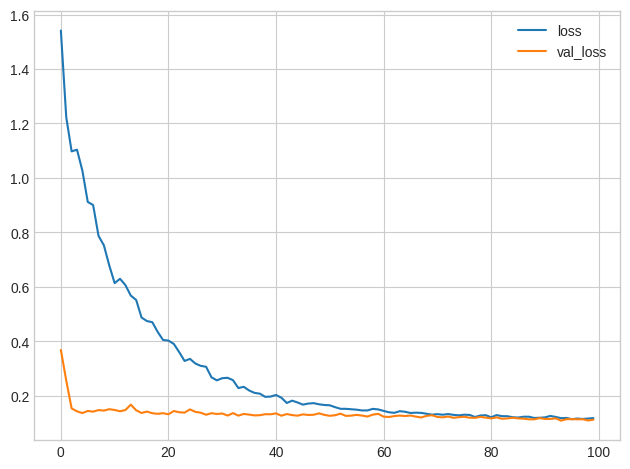

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

Dalam grafik:
  * Loss Pelatihan (garis biru) menunjukkan seberapa baik model memetakan data pelatihan.
  * Loss Validasi (garis oranye) menunjukkan seberapa baik model memetakan data validasi yang tidak pernah dilihat sebelumnya.

Jika kedua garis bergerak mendekati satu sama lain, itu menunjukkan bahwa model tidak mengalami overfitting (memperhatikan data pelatihan terlalu baik, tetapi tidak umum untuk data baru). Jika garis loss validasi lebih tinggi daripada loss pelatihan, ini bisa menjadi tanda overfitting.